<a href="https://colab.research.google.com/github/mmcza/Selected-topics-of-Machine-Learning/blob/main/Interaktywny_Notebook_Google_Colab_Analiza_Danych_z_Seaborn_i_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

📊 2. Załaduj zestaw danych "tips" i zbadaj jego strukturę

In [3]:
# %% Zaimportowanie potrzebnych bibliotek
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

tips = sns.load_dataset('tips')
print("Podgląd danych o napiwkach:\n")
tips.head()


Podgląd danych o napiwkach:



,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Sprawdź typy danych, rozmiar oraz unikalne wartości w każdej kolumnie.

💡 Podpowiedź: Podpowiedzi:

1. Użyj tips.info(), aby zobaczyć typy kolumn i brakujące dane.
2. Użyj tips.describe(), aby poznać statystyki opisowe.
3. Użyj tips['day'].unique(), aby wyświetlić unikalne dni tygodnia














<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

Przeanalizujmy zależność między rachunkiem a napiwkiem. Wykres rozrzutu (scatter plot) pokaże nam czy istnieje zależność między większym rachunkiem a większym napiwkiem

 **Pytania**
Czy większy rachunek zwykle oznacza większy napiwek?
Jakie dni tygodnia wydają się mieć wyższe rachunki lub napiwki?

💡 Podpowiedź: Możesz dodać kolory (hue) według day lub sex, aby zobaczyć różnice.

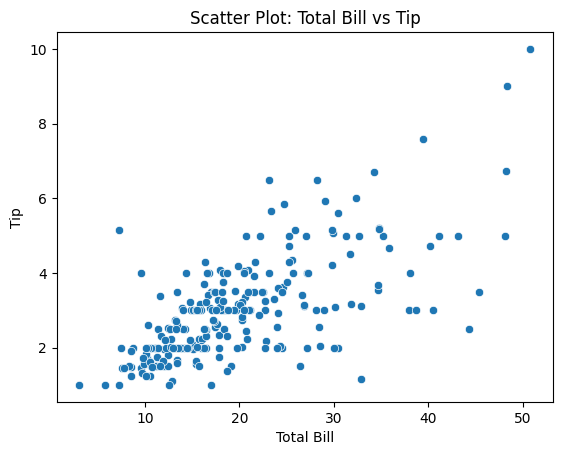

In [5]:
sns.scatterplot(x='total_bill', y='tip', data=tips)
plt.title("Scatter Plot: Total Bill vs Tip")
plt.xlabel("Total Bill")
plt.ylabel("Tip")
plt.show()



1.   Utwórz wykres słupkowy (bar plot) przedstawiający średni rachunek dla każdego dnia tygodnia.

2.   Utwórz wykres pudełkowy (box plot), aby zobaczyć rozkład rachunków w zależności od dnia

**Pytania:**
1. Który dzień tygodnia ma najwyższe średnie rachunki?
2. Jakie wnioski można wyciągnąć z wykresu pudełkowego? Czy jest dużo ekstremalnych wartości?
3. Eksperyment: Dodaj hue='sex' do wykresu słupkowego. Czy widać różnice między płciami?

💡 Podpowiedź: Wykorzystaj sns.barplot() i sns.boxplot() z parametrem x='day', y='total_bill'

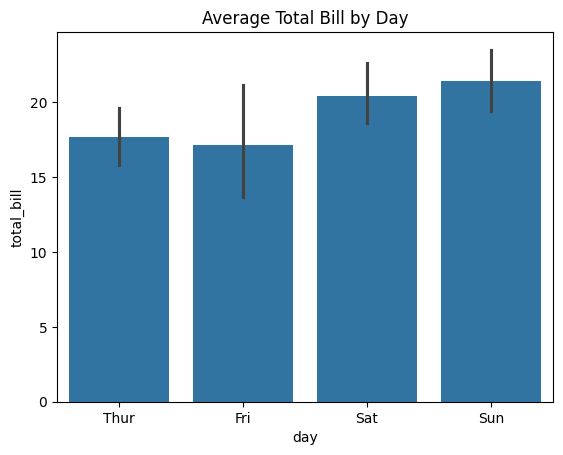

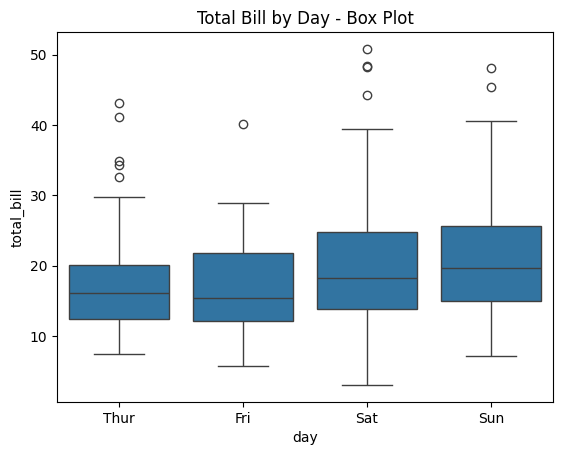

In [6]:
# %%
# Bar plot
sns.barplot(x='day', y='total_bill', data=tips)
plt.title('Average Total Bill by Day')
plt.show()

# Box plot
sns.boxplot(x="day", y='total_bill', data=tips)
plt.title("Total Bill by Day - Box Plot")
plt.show()


*Zadanie 4:*
Histogram i KDE dla analizy rozkładu
Utwórz histogram dla rachunków (total_bill) i dodaj wykres KDE.
Eksperyment: Zmieniaj liczbę bins w histogramie i zobacz, jak to wpływa na rozkład.

💡 Podpowiedź: Wykorzystaj sns.histplot() i kde=True.

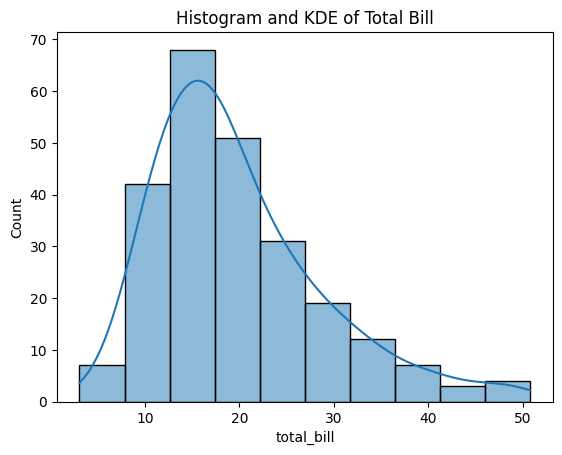

In [7]:
# %%
sns.histplot(tips['total_bill'], bins=10, kde=True)
plt.title("Histogram and KDE of Total Bill")
plt.show()


*Zadanie 5:* Heatmap do analizy korelacji
Oblicz korelację między total_bill, tip, a size.
Utwórz mapę cieplną (heatmap) korelacji i zinterpretuj wyniki.
Pytania:

1.Które zmienne są najsilniej skorelowane? Dlaczego tak może być?
2. Jak korelacja między total_bill a tip może wpłynąć na nasze wnioski o relacji między nimi?
3. Eksperyment: Spróbuj dodać inne kolumny (np. sex, smoker). Czy pojawiają się interesujące korelacje?


💡 Podpowiedź: Użyj sns.heatmap() z annot=True.

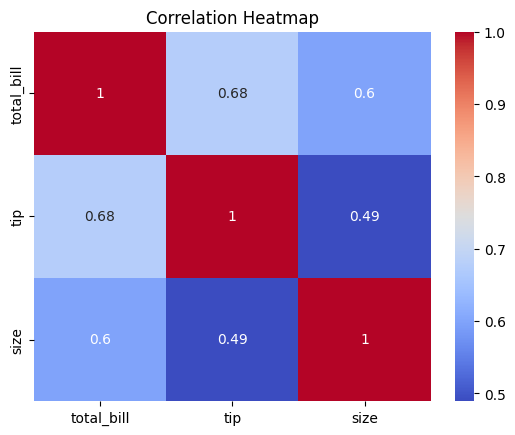

In [8]:
# %%
corr = tips[['total_bill', 'tip', 'size']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Załaduj zbiór danych car_crashes i sprawdź podstawowe informacje:
Sprawdź typy kolumn oraz brakujące wartości, aby lepiej zrozumieć strukturę danych.

1.Wyświetl statystyki opisowe, aby zobaczyć rozkład wartości
liczbowych.

2.Wykorzystaj Pandas, aby obliczyć:
- Liczbę stanów w zbiorze danych.
- Średnią, medianę i odchylenie standardowe dla total, speeding, alcohol, ins_premium.

💡 Podpowiedź: Użyj car_crashes.info() oraz car_crashes.describe().

In [40]:
from sklearn.datasets import fetch_openml
import pandas as pd

chess_data = fetch_openml(data_id=43566, as_frame=True)
df = chess_data.frame
print(df.head())

print("Kolumny w zbiorze danych:\n", df.columns)



/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_arff_parser.py:400: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  frame = pd.read_csv(gzip_file, **read_csv_kwargs)


   Fide_id                 Name Federation Gender  Year_of_birth Title  \
0  1503014      Carlsen, Magnus        NOR      M         1990.0    GM   
1  2020009     Caruana, Fabiano        USA      M         1992.0    GM   
2  4100018      Kasparov, Garry        RUS      M         1963.0    GM   
3  8603677          Ding, Liren        CHN      M         1992.0    GM   
4  4168119  Nepomniachtchi, Ian        RUS      M         1990.0    GM   

   Standard_Rating  Rapid_rating  Blitz_rating Inactive_flag  
0           2863.0        2881.0        2886.0           NaN  
1           2835.0        2773.0        2711.0           NaN  
2           2812.0        2783.0        2801.0             i  
3           2791.0        2836.0        2788.0           NaN  
4           2784.0        2778.0        2785.0           NaN  
Kolumny w zbiorze danych:
 Index(['Fide_id', 'Name', 'Federation', 'Gender', 'Year_of_birth', 'Title',
       'Standard_Rating', 'Rapid_rating', 'Blitz_rating', 'Inactive_flag']

# 📊 Analiza Aktywnych Graczy i Federacji 🌎

### Opis Zadania:
W tym ćwiczeniu przeprowadzimy analizę dotyczącą liczby aktywnych graczy oraz reprezentowanych federacji.

---

#### Krok 1: Liczba Aktywnych Graczy

Najpierw obliczymy liczbę graczy, którzy są **aktywni**. W tym zbiorze danych kolumna `Inactive_flag` wskazuje, czy gracz jest aktywny.

#### 📌 Podpowiedź:
Jeśli wartość w tej kolumnie jest pusta (`NaN`), oznacza to, że gracz jest aktywny.

#### Krok 2: Liczba Różnych Federacji
Teraz sprawdzimy, ile unikalnych federacji znajduje się w zbiorze danych.

####📌 Podpowiedź:
Aby policzyć liczbę różnych federacji, możesz użyć metody nunique().

#### Krok 3: Liczba Aktywnych Graczy w Każdej Federacji
Ostatecznie przeprowadzimy bardziej szczegółową analizę liczby aktywnych graczy w każdej federacji.

#### 📌 Podpowiedź:
Użyj agregacji groupby('Federation').size(), aby uzyskać liczbę aktywnych graczy w każdej federacji.

In [61]:
import pandas as pd

# 1. Liczba aktywnych graczy
# Zakładamy, że NaN w 'Inactive_flag' oznacza aktywnego gracza
num_active_players = df['Inactive_flag'].isna().sum()
print("Liczba aktywnych graczy:", num_active_players)

# 2. Liczba unikalnych federacji
num_federations = df['Federation'].nunique()
print("Liczba unikalnych federacji:", num_federations)


# 3. Liczba aktywnych graczy w każdej federacji
active_players_by_federation = df[df['Inactive_flag'].isna()].groupby('Federation').size()
print("\nLiczba aktywnych graczy w każdej federacji:")
print(active_players_by_federation)



Liczba aktywnych graczy: 764494
Liczba unikalnych federacji: 198

Liczba aktywnych graczy w każdej federacji:
Federation
AFG     195
AHO     186
ALB     478
ALG    3875
AND     121
       ... 
VIE    2125
WLS     386
YEM     371
ZAM    1748
ZIM     908
Length: 198, dtype: int64


#### 📊 Zadanie: Wykres Słupkowy Liczby Aktywnych Graczy w Federacjach Szachowych

Stworzenie wykresu słupkowego, który pokaże liczbę aktywnych graczy w top 10 federacjach.
Kroki do wykonania:
1. Na podstawie poprzedniego zadania bazuj  na kodzie do filtrowania aktywnych graczy. (krok 1 z poprzedniego zadania).

2. Po grupowaniu, zlicz liczbę graczy w każdej grupie, tak aby każda federacja miała przypisaną liczbę swoich aktywnych zawodników. (wykorzystaj krok 2 z poprzedniego zadania).

3. Następnie wybierz tylko top 10 federacji z największą liczbą aktywnych zawodników. To te federacje będą widoczne na wykresie. ( wykorzystaj przykładowo do tego z biblioteki pandas sort.values i head)

4. Tworzenie wykresu słupkowego
wykorzystaj bibliotekę seaborn do wykresu słupkowego. Dodaj rotację etykiet na osi X (np. 45 stopni), aby nazwy federacji były czytelne. Ustaw tytuł wykresu oraz opisy osi.


<ipython-input-60-943a925e6cb9>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




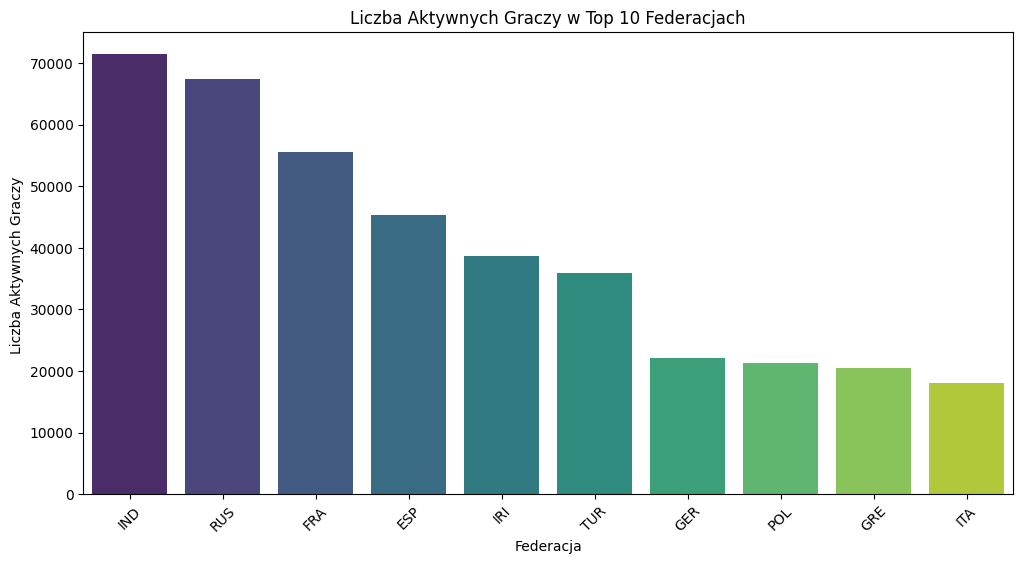

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

active_players_by_federation = df[df['Inactive_flag'].isna()].groupby('Federation').size().reset_index(name='Active_Players')

# Sortowanie federacji według liczby aktywnych graczy i wybór top 10
top_10_federations = active_players_by_federation.sort_values('Active_Players', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_federations, x='Federation', y='Active_Players', palette='viridis')
plt.xticks(rotation=45)
plt.title("Liczba Aktywnych Graczy w Top 10 Federacjach")
plt.xlabel("Federacja")
plt.ylabel("Liczba Aktywnych Graczy ")
plt.show()




## Zaawansowane elementy do tworzenia interaktywnych wizualizacji przy pomocy plotly

Kroki do wykonania
1. Filtracja do aktywnych graczy i wybór top 4 federacjach
W pierwszym kroku wybierz tylko aktywnych graczy z danych. Wartość NaN w kolumnie Inactive_flag oznacza, że gracz jest aktywny.
Następnie zlicz liczbę aktywnych graczy w każdej federacji, posortuj federacje według liczby aktywnych graczy i wybierz top 4 federację.

2. Wybór top 3 najlepszych graczy dla każdej federacji
Dla każdej z wybranych federacji znajdź trzech najlepszych graczy, opierając się na ich rankingu (Standard_Rating).
📌 Przydatne Wskazówki:

- Funkcja nlargest: nlargest pozwala wybrać określoną liczbę (n) największych wartości w danej kolumnie. To przydatne, gdy chcemy wybrać np. top 3 graczy według rankingu.
Przykład: Aby wybrać 3 najwyższe wartości w kolumnie Score, użyj df.nlargest(3, 'Score').

- Funkcja append (dla list) służy do dodawania elementów na końcu listy, co jest przydatne, gdy w pętli zapisujesz wyniki dla każdego elementu i chcesz połączyć je później w jedną całość.
Przykład: Jeśli chcesz dodać do listy results kolejny DataFrame df, użyj results.append(df).


- Funkcja pd.concat przydatna jeśli mamy listę DataFrame'ów df_list, możemy połączyć je w jeden DataFrame za pomocą pd.concat(df_list).

3. Utworzenie wykresu słupkowego
Skorzystaj z plotly.express i funkcji px.bar() do stworzenia wykresu słupkowego. Umieść nazwy federacji na osi Y, a rankingi graczy na osi X, aby wykres był poziomy i bardziej czytelny.
Wskazówka: Skonfiguruj hover_data, aby wyświetlać imię, nazwisko i wynik gracza po najechaniu kursorem na słupek.

In [72]:
import pandas as pd
import plotly.express as px

active_players = df[df['Inactive_flag'].isna()]
active_players_by_federation = active_players.groupby('Federation').size().reset_index(name='Active_Players')
top_4_federations = active_players_by_federation.sort_values('Active_Players', ascending=False).head(4)['Federation']

top_players = []
for federation in top_4_federations:
    top_gr = active_players[active_players['Federation'] == federation].nlargest(3, 'Standard_Rating')
    top_gr['Position'] = ['Top 1', 'Top 2', 'Top 3']
    top_gr['Federation_Position'] = federation + " - " + top_gr['Position']
    top_players.append(top_gr[['Federation_Position', 'Federation', 'Name', 'Standard_Rating', 'Position']])

top_players_df = pd.concat(top_players)


fig = px.bar(
    top_players_df,
    x='Federation_Position',
    y='Standard_Rating',
    color='Position',
    text='Standard_Rating',
    hover_data={'Name': True, 'Standard_Rating': True},
    labels={'Position': 'Pozycja'},
)

fig.update_layout(
    xaxis_title="Federacja i Pozycja",
    yaxis_title="Ranking Gracza",
    title="Top 3 Gracze w Top 3 Federacjach według Rankingu",
    legend_title="Pozycja Gracza",
    xaxis=dict(categoryorder='array', categoryarray=top_players_df['Federation_Position'])
)

fig.show()


